# 2. How to use the fundamentals OpenCV-Python - OpenCV-Python 기초 사용법

## 1) image attributes & pixel value reference - 영상의 속성과 픽셀 값 참조
<hr>

- OpenCV는 영상 데이터를 numpy.ndarray로 표현한다.
- 영상 데이터를 표현하는 속성들
    - ndim : 차원 수를 의미.<br>
(e.g.) 그레이스케일 영상은 h, w 2차원이고, 컬러 영상은 h, w, 3 으로 3차원의 형태이다.
    - shape : 각 차원의 크기를 의미.
    - size : 전체 원소의 개수를 의미.
    - dtype : 원소의 데이터 타입을 의미.<br>
일반적인 영상 데이터는 1px 당 1byte로 색상 정보를<br>
표현하기 때문에 uint8 타입을 가진다.
    - 참고사항
        - numpy.ndarray -> NumPy에서 사용하는 차원이 n개인 행렬

<hr>

### [Table] single channel data types - 1채널 자료형
|OpenCV 자료형(1채널)|NumPy 자료형|구분|
|:-|:-|:-|
|cv2.CV_8U|numpy.uint8|8비트 부호 없는 정수|
|cv2.CV_8S|numpy.int8|8비트 부호 있는 정수|
|cv2.CV_16U|numpy.uint16|16비트 부호 없는 정수|
|cv2.CV_16S|numpy.int16|16비트 부호 있는 정수|
|cv2.CV_32S|numpy.int32|32비트 부호 있는 정수|
|cv2.CV_16F|numpy.float16|16비트 부동소수형|
|cv2.CV_32F|numpy.float32|32비트 부동소수형|
|cv2.CV_64F|numpy.float64|64비트 부동소수형|

- 그레이스케일 영상 : cv2.CV_8UC1(8비트 부호 없는 정수이고, 채널이 1개이다.) -> numpy.uint8, shape = (h, w)
- 컬러 영상 : cv2.CV_8UC3(8비트 부호 없는 정수이고, 채널이 3개이다.) -> numpy.uint8, shape = (h, w, 3)

In [10]:
### search image data types
import cv2

image1 = cv2.imread('./images/cat.bmp', cv2.IMREAD_GRAYSCALE)  # load image as grayscale
image2 = cv2.imread('./images/cat.bmp')  # load image as color. default cv2.IMREAD_COLOR

## output images data types
print('image1 type :', type(image1))
print("image1 data type :", image1.dtype)
print('image2 type :', type(image2))
print("image2 data type :", image2.dtype)
print('-'*50)
print('image1 shape :', image1.shape)
print('image2 shape :', image2.shape)
print('-'*50)
print('image1 dtype :', image1.dtype)
print('image2 dtype :', image2.dtype)
print('-'*50)
print('image1 size w x h =', image1.size)
print('image2 size w x h x ch =', image2.size)
print('-'*50)

# 115 ns ± 4.67 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
# if len(image1.shape) == 2:
#     print('image1 is a grayscale image')

# 52.6 ns ± 2.69 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
if image1.ndim == 2:
    print('image1 is a grayscale image')

print('-'*50)

## get pixel values what i want
x = 20
y = 10
pixel1 = image1[y, x]
pixel2 = image2[y, x]
print(pixel1)
print('[B G R] =', pixel2)

image1 type : <class 'numpy.ndarray'>
image1 data type : uint8
image2 type : <class 'numpy.ndarray'>
image2 data type : uint8
--------------------------------------------------
image1 shape : (480, 640)
image2 shape : (480, 640, 3)
--------------------------------------------------
image1 dtype : uint8
image2 dtype : uint8
--------------------------------------------------
image1 size w x h = 307200
image2 size w x h x ch = 921600
--------------------------------------------------
image1 is a grayscale image
--------------------------------------------------
238
[B G R] = [237 242 232]


## 2) Prodution, Copy, Partial Image Extraction of Image - 영상의 생성, 복사, 부분 영상 추출
<hr>

> `지정한 크기로 새 영상을 생성하는 NumPy 함수들`
$$\mathsf{{\color{RoyalBlue}numpy.}{\color{Tan}empty}(shape, dtype, ...) -> ndarray}$$
$$\mathsf{{\color{RoyalBlue}numpy.}{\color{Tan}zeros}(shape, dtype, ...) -> ndarray}$$
$$\mathsf{{\color{RoyalBlue}numpy.}{\color{Tan}ones}(shape, dtype, ...) -> ndarray}$$
$$\mathsf{{\color{RoyalBlue}numpy.}{\color{Tan}full}(shape, fill\_ value, dtype, ...) -> ndarray}$$
- shape : 각 차원의 크기 - (h, w) or (h, w, 3)
    - (i.e.) 3채널 색상에 1개의 alpha 채널이 더 지원되는 png 파일도 있다. 총 4채널
- dtype : data type. 원소의 데이터 타입. 일반적인 영상이면 numpy.uint8 지정
- ndarray : n dimention array. 생성된 영상(numpy.ndarray)
- 참고사항
    - numpy.empty() 함수는 임의의 값으로 초기화된 배열을 생성
    - numpy.zeros() 함수는 0으로 초기화된 배열을 생성
    - numpy.ones() 함수는 1로 초기화된 배열을 생성
    - numpy.full() 함수는 정의된 fill\_value로 초기화된 배열을 생성

In [ ]:
import numpy as np
help(np.empty)

In [ ]:
import numpy as np
help(np.zeros)

In [ ]:
import numpy as np
help(np.ones)

In [ ]:
import numpy as np
help(np.full)

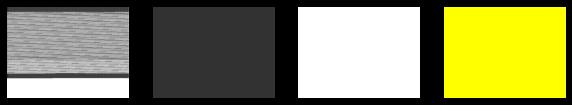

In [21]:
### create arrays and output using 4 differences functions
import cv2
import matplotlib.pyplot as plt
import numpy as np

## create new image arrays
image1 = np.empty((480, 640), np.uint8)
image2 = np.zeros((480, 640, 3), np.uint8) + 50
image3 = np.ones((480, 640, 3), np.uint8) * 255
image4 = np.full((480, 640, 3), (0, 255, 255), np.uint8)

## convert image order <- it's not necessary.
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
# image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

## output with pyplot
plt.figure(figsize=(10, 5))  # set plot size
plt.subplot(141), plt.axis('off'), plt.imshow(image1, "gray")  # grayscale image
plt.subplot(142), plt.axis('off'), plt.imshow(image2)  # color image
plt.subplot(143), plt.axis('off'), plt.imshow(image3)  # white image
plt.subplot(144), plt.axis('off'), plt.imshow(image4[:,:,::-1])  # yellow image
plt.show()

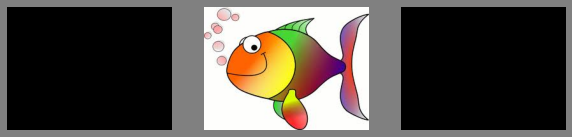

In [25]:
### copy images
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('./images/HappyFish.jpg')  # load image as color

image2 = image1.copy()  # copy "image1"

# not recommended except specific situation.
image3 = image1  # refer to "image1"
image3.fill(0)  # affect to "image1"

## output with pyplot
plt.figure(figsize=(10, 5), facecolor="gray")  # set plot size & background color
plt.subplot(131), plt.axis('off'), plt.imshow(image1)
plt.subplot(132), plt.axis('off'), plt.imshow(image2[:,:,::-1])
plt.subplot(133), plt.axis('off'), plt.imshow(image3)
plt.show()

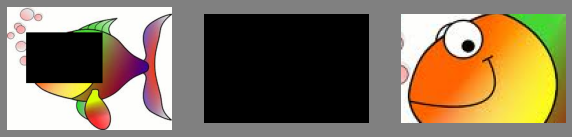

In [27]:
### extract a part of images
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('./images/HappyFish.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = image1[40:120, 30:150]  # h에서 80만큼, w에서 120만큼 슬라이싱

image3 = image1[40:120, 30:150].copy()  # copy "image2"

image2.fill(0)  # also affects "image1"

## output with pyplot
plt.figure(figsize=(10, 5), facecolor="gray")  # set plot size & background color
plt.subplot(131), plt.axis('off'), plt.imshow(image1)
plt.subplot(132), plt.axis('off'), plt.imshow(image2)
plt.subplot(133), plt.axis('off'), plt.imshow(image3)
plt.show()

## 3) Mask Operating & ROI(Region of Interest) - 마스크 연산과 ROI
<hr>

- ROI
    - Region of Interest(관심 영역)
    - 영상에서 특정 연산을 수행하고자 하는 임의의 부분 영역
<hr>

- 마스크 연산
    - OpenCV는 일부 함수에 대해 ROI연산을 지원하며, 이 때 마스크 영상을 인수로 함께 전달해야 한다.
        - 함수 예) cv2.copyTo(), cv2.calcHist(), cv2.bitwise_or(), cv2.matchTemplate(), etc.
    - 마스크 영상은 cv2.CV_8UC1 타입(그레이스케일 영상)이다.
    - 마스크 영상의 픽셀 값이 0이 아닌 위치에서만 연산이 수행된다.
        - 보통 마스크 영상으로는 0 또는 255로 구성된 이진 영상(binary image)을 사용한다.
    - src, mask, dst는 모두 크기가 같아야 한다.
    - src와 dst는 같은 타입이어야 하고, mask는 그레이스케일 타입의 이진 영상.
<hr>

> `마스크 연산을 지원하는 픽셀 값 복사 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}copyTo}(src, mask, dst) -> dst}$$
- src : source matrix. 입력 영상. 영상 파일의 경로와 파일 이름 등의 정보를 함축한다.
- mask : 마스크 영상. cv2.CV_8U(numpy.uint8)<br>
0이 아닌 픽셀에 대해서만 복사 연산을 수행
- dst : destination matrix. 출력 영상. 만약 src와 크기 및 타입이 같은 dst를 입력으로 지정하면<br>
dst를 새로 생성하지 않고 연산을 수행한다.<br>
그렇지 않으면 dst를 새로 생성하여 연산을 수행한 후 반환한다.

In [ ]:
import cv2
help(cv2.copyTo)

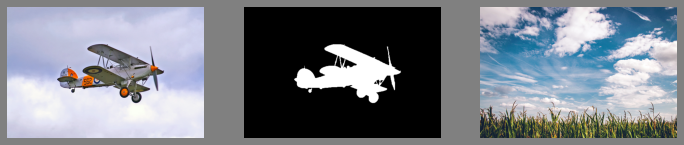

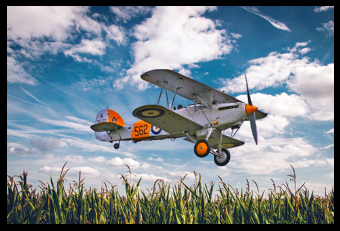

In [29]:
### execute mask operation 1
import cv2
import matplotlib.pyplot as plt

source = cv2.imread('./images/airplane.bmp')
mask_ = cv2.imread('./images/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
destination = cv2.imread('./images/field.bmp')

## output with pyplot
plt.figure(figsize=(12, 6), facecolor="gray")  # set plot size & background color
plt.subplot(131), plt.axis('off'), plt.imshow(source[:,:,::-1])
plt.subplot(132), plt.axis('off'), plt.imshow(mask_, cmap='gray')
plt.subplot(133), plt.axis('off'), plt.imshow(destination[:,:,::-1])
plt.show()

cv2.copyTo(src=source, mask=mask_, dst=destination)  # get masked image
# 또 다른 방법으로는 NumPy에서 제공하는 불리언 인덱싱 방법으로도 동일한 마스크 연산을 실행할 수 있다.
# dst_[mask_ > 0] = src_[mask_ > 0]
plt.imshow(destination[:,:,::-1])
plt.axis('off')
plt.show()

(222, 180, 3)
(480, 640, 3)


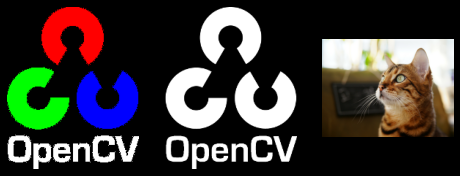

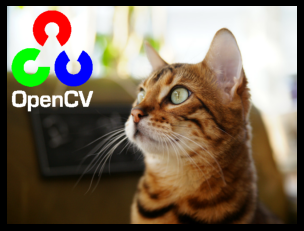

In [30]:
### execute mask operation 1
import cv2
import matplotlib.pyplot as plt

source = cv2.imread('./images/opencv-logo-white.png', cv2.IMREAD_UNCHANGED)
destination = cv2.imread('./images/cat.bmp')

mask_ = source[:, :, 3]  # alpha channel
source = source[:, :, :-1]  # RGB channels

# the sizes of "source" and "destination" do not match.
print(source.shape)
print(destination.shape)

# this is why refer to image in specific situation.
h, w = mask_.shape
crop = destination[10:10 + h, 10:10 + w]  # affect to "destination"

## output with pyplot
plt.figure(figsize=(8, 4))  # set plot size
plt.subplot(131), plt.axis('off'), plt.imshow(source[:,:,::-1])
plt.subplot(132), plt.axis('off'), plt.imshow(mask_, cmap='gray')
plt.subplot(133), plt.axis('off'), plt.imshow(destination[:,:,::-1])
plt.show()

cv2.copyTo(source, mask_, crop)
plt.imshow(destination[:,:,::-1])
plt.axis('off')
plt.show()

## 4) Drawing Functions of OpenCV - OpenCV 그리기 함수

<hr>

### Drawing Functions Reference & Kinds - 그리기 함수 참조 및 종류
<hr>

- OpenCV는 영상에 선, 도형, 문자열을 출력하는 그리기 함수를 제공한다.
    - 선 그리기 : 직선, 화살표, 마커 등
    - 도형 그리기 : 사각형, 원, 타언, 다각형 등
    - 문자열 출력
<hr>

- 그리기 함수 사용 시 주의할 점
    - 그리기 알고리즘을 이용하여 영상의 픽셀 값 자체를 변경한다.(영상 훼손)
        - 원본 영상이 필요하면 복사본을 만들어서 그 위에 그리기 & 출력
    - 그레이스케일 영상에는 컬러로 그리기가 안 된다.
        - cv2.cvtColor() 함수로 BGR 컬러 영상으로 변환한 후 그리기 함수를 호출
        - matplotlib 으로 출력할 시 RGB 컬러 영상으로 변환
<hr>

> `직선 그리기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}line}(img, pt1, pt2, color, thickness, lineType, shift) -> img}$$
- img : image. 그림을 그릴 영상
- pt1 & pt2 : point. 직선의 시작점과 끝점. (x, y) 각각 튜플 형식
- color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
- thickness : 선 두께. 기본값은 1(px단위)
- lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
- shift : 그리기 좌표 값의 축소 비율. 기본값은 0
<hr>

> `사각형 그리기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}rectangle}(img, pt1, pt2, color, thickness, lineType, shift) -> img}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}rectangle}(img, rectangle, color, thickness, lineType, shift) -> img}$$
- img : image. 그림을 그릴 영상
- pt1 & pt2 : point. 사각형의 두 꼭지점 좌표. (x, y) 각각 튜플 형식
- rectangle : 사각형의 위치 정보. (x, y, w, h) 튜플 형식
- color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
- thickness : 선 두께. 기본값은 1(px단위). 음수(-1)를 지정하면 내부를 채운다.
- lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
- shift : 그리기 좌표 값의 축소 비율. 기본값은 0
<hr>

> `원 그리기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}circle}(img, center, radius, color, thickness, lineType, shift) -> img}$$
- img : image. 그림을 그릴 영상
- center : 원의 줌실점의 좌표. (x, y) 튜플 형식
- radius : 원의 반지름. 정수값
- color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
- thickness : 선 두께. 기본값은 1(px단위). 음수(-1)를 지정하면 내부를 채운다.
- lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
- shift : 그리기 좌표 값의 축소 비율. 기본값은 0
<hr>

> `다각형 그리기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}polylines}(img, points, isClosed, color, thickness, lineType, shift) -> img}$$
- img : image. 그림을 그릴 영상
- pts : points. 다각형 외곽 점들의 좌표 배열. numpy.ndarra를 리스트 형식으로 감싸서 전달한다.<br>
다각형 외곽 점들의 좌표 값은 시계 방향으로 지정한다.<br>
(e.g.) [np.array([[10, 10], [50, 50], [10, 50]], dtype=np.int32)]
- isClosed : 폐곡선 여부. True or False로 지정.
    - True이면 마지막 꼭지점과 첫 번째 꼭지점을 연결 시킨다.
    - False이면 마지막 꼭지점과 첫 번째 꼭지점을 연결하지 않은 상태로 출력 한다.
- color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
- thickness : 선 두께. 기본값은 1(px단위). 음수(-1)를 지정하면 내부를 채운다.
- lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
- shift : 그리기 좌표 값의 축소 비율. 기본값은 0
<hr>

> `문자열 출력 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}putText}(img, text, org, fontFace, fontScale, color, thickness,
            lineType, bottomLeftOrigin) -> img}$$
- img : image. 문자열을 그릴 영상
- text : 출력할 문자열
- org : origin. 영상에서 문자열을 출력할 위치의 좌측 하단 좌표. (x, y) 튜플 형식
- fontFace : 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
- fontScale : 폰트 크기 확대/축소 비율(em단위)
- color : 폰트 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
- thickness : 폰트 두께. 기본값은 1(px단위)
- lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
- bottomLeftOrigin : True이면 영상의 좌측 하단을 원점으로 간주. 기본값은 False
- 참고사항 : 아래 영상은 cv2.putText()에서 지원하는 fontface 상수와 실제 출력 모양이다.

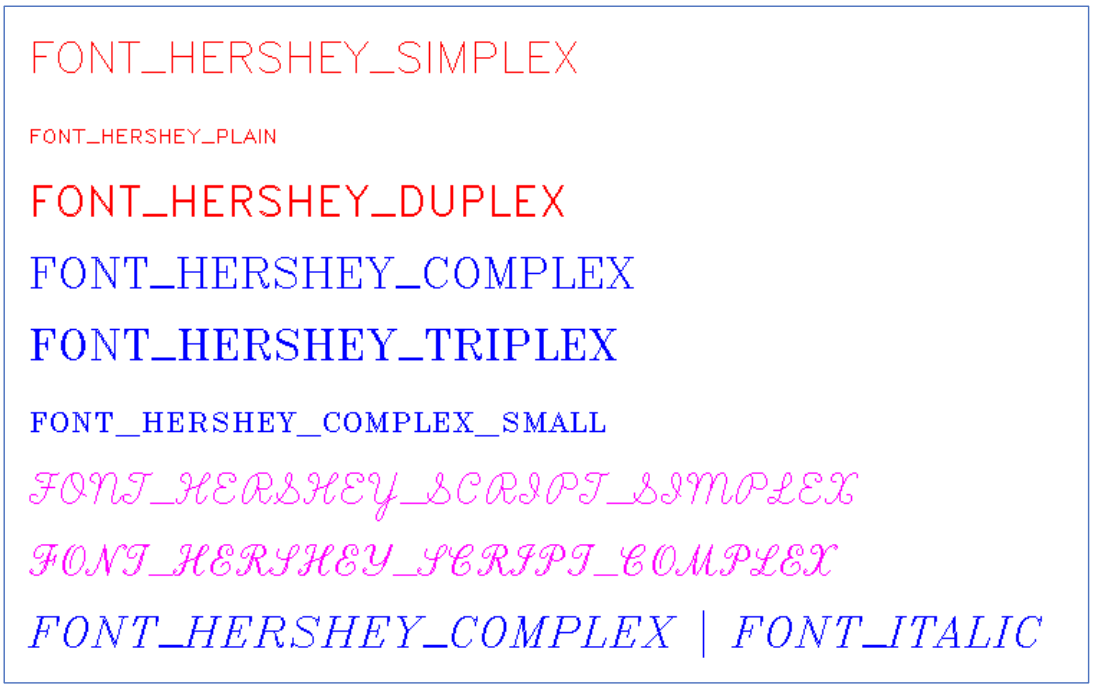

In [ ]:
from IPython.display import Img
Img('./imgs/fontface.png')  # fontface output

새 그림판을 생성합니다.


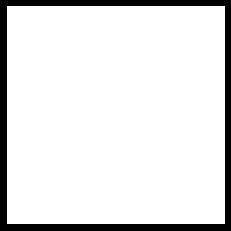

In [38]:
## 5개의 그리기 함수 예제를 통해 한 곳에 그려 넣어보기
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 새 영상 생성하기(흰 색 그림판)
print('새 그림판을 생성합니다.')
image = np.full(shape=(400, 400, 3), fill_value=255, dtype=np.uint8)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import cv2
help(cv2.line)

직선 2개가 생성되었습니다.


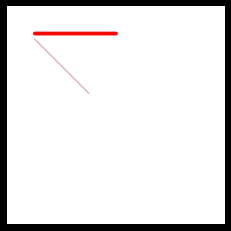

In [39]:
# 직선 그리기
print('직선 2개가 생성되었습니다.')
cv2.line(image, pt1=(50, 50), pt2=(200, 50), color=(255, 0, 0), thickness=5)
cv2.line(image, pt1=(50, 60), pt2=(150, 160), color=(128, 0, 0))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import cv2
help(cv2.rectangle)

사각형 2개가 생성되었습니다.


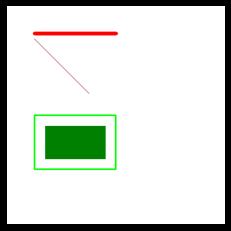

In [40]:
# 사각형 그리기
print('사각형 2개가 생성되었습니다.')
cv2.rectangle(image, rec=(50, 200, 150, 100), color=(0, 255, 0), thickness=2)
cv2.rectangle(image, pt1=(70, 220), pt2=(180, 280), color=(0, 128, 0), thickness=-1)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import cv2
help(cv2.circle)

원 2개가 생성되었습니다.


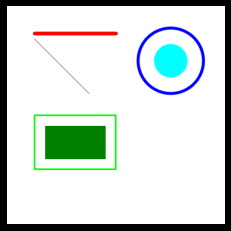

In [41]:
# 원 그리기
print('원 2개가 생성되었습니다.')
cv2.circle(image, center=(300, 100), radius=60, color=(0, 0, 255),
           thickness=3, lineType=cv2.LINE_AA)
cv2.circle(image, center=(300, 100), radius=30, color=(0, 255, 255),
           thickness=-1, lineType=cv2.LINE_AA)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import cv2
help(cv2.polylines)

사다리꼴 도형이 생성되었습니다.


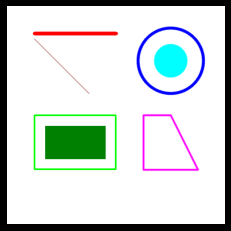

In [42]:
# 다각형 그리기
print("사다리꼴 도형이 생성되었습니다.")
pts_ = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])  # 시계 방향으로 지정
cv2.polylines(image, pts=[pts_], isClosed=True, color=(255, 0, 255),
              thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import cv2
help(cv2.putText)

문구가 생성되었습니다.


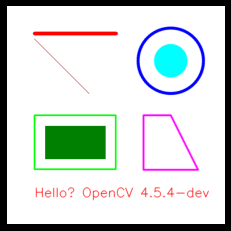

In [43]:
# 문자열 출력
print('문구가 생성되었습니다.')
text_ = 'Hello? OpenCV ' + cv2.__version__
cv2.putText(image, text=text_, org=(50, 350), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=.8, color=(255, 0, 0), lineType=cv2.LINE_AA)
plt.imshow(image)
plt.axis('off')
plt.show()

## 5) Camera & Video Processing 1 - 카메라와 동영상 처리하기 1

<hr>

### cv2.VideoCapture Class
<hr>

- OpenCV에서는 카메라와 동영상으로부터 프레임(frame)을 받아오는 작업을 cv2.VideoCapture 클래스 하나로 처리한다.
<hr>

> `카메라 열기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture(index, apipreference) -> retval}$$
- index : camera_id + domain_offset_id. 시스템 기본 카메라를 기본 방법으로 열려면 0을 전달
- apipreference : 선호하는 카메라 처리 방법을 지정
- retval : return value. cv2.VideoCapture 인스턴스(객체)
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture.{\color{Tan}open}(index, apiPreference) -> retval}$$
- retval : return value. 성공하면 True, 실패하면 False
<hr>

> `동영상, 정지 영상 시퀀스, 비디오 스트림 열기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture(filename, apipreference) -> retval}$$
- filename : 비디오 파일이 있는 경로와 파일 이름. 그 외 정지 영상 시퀀스, 비디로 스트림 URL 등
- apipreference : 선호하는 동영상 처리 방법을 지정
- retval : return value. cv2.VideoCapture 인스턴스(객체)
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture.{\color{Tan}open}(filename, apipreference) -> retval}$$
- retval : return value. 성공하면 True, 실패하면 False
<hr>

> `비디오 캡쳐가 준비되었는지 확인하는 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture.{\color{Tan}isOpened}() -> retval}$$
- retval : return value. 성공하면 True, 실패하면 False
<hr>

> `프레임 받아 오기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture.{\color{Tan}read}(image) -> retval, image}$$
- retval : return value. 성공하면 True, 실패하면 False
- image : 현재 프레임(numpy.ndarray)
<hr>

> `카메라, 비디로 장치 속성 값 참조 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture.{\color{Tan}get}(propId) -> retval}$$
- propId : 속성 상수
- retval : return value. 성공하면 해당 속성 값, 실패하면 0
$$\mathsf{{\color{RoyalBlue}cv2.}VideoCapture.{\color{Tan}set}(propId, value) -> retval}$$
- propId : 속성 상수
- value : 속성 값
- retval : return value. 성공하면 True, 실패하면 False
<hr>

> `할당된 자원을 해제하는 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VedeoCapture.{\color{Tan}release}()}$$

<hr>

### [Table] Attribute Constants - 속성 상수 
[<OpenCV 문서 참고>](https://docs.opencv.org/4.1.0/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d "속성 상수")

|속성 상수|설명|
|:-|:-|
|CAP_PROP_FRAME_WIDTH|프레임 가로 크기|
|CAP_PROP_FRAME_HEIGHT|프레임 세로 크기|
|CAP_PROP_FPS|초당 프레임 수|
|CAP_PROP_FRAME_COUNT|비디로 파일의 총 프레임 수|
|CAP_PROP_POS_MSEC|밀리초 단위로 현재 위치|
|CAP_PROP_POS_FRAMES|현재 프레임 번호|
|CAP_PROP_EXPOSURE|노출|

※ CAP_PROP -> capture device property

※ POS -> position

In [ ]:
import cv2
help(cv2.VideoCapture.set)

In [ ]:
## 카메라 처리 예제 - 시스템 기본 카메라 장치 열기
import sys
import cv2

# 카메라 장치 열기
# 인수를 0을 전달 함으로 시스템 기본 카메라 장치를 연다.
capture = cv2.VideoCapture(0)

# 예외 처리
if not capture.isOpened():
    print('Camera open failed!')
    sys.exit()

# 카메라 프레임 크기 출력
print('Frame width :', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height :', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# 카메라 프레임 크기 설정
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

# 카메라 프레임 처리
# 카메라로부터 프레임을 정상적으로 받아오면 retval에는 True, frame에는 해당 프레임이 저장 된다.
while True:
    retval, frame = capture.read()
    
    if not retval:  # 반환 값이 False이면 멈춤
        break
    
    inversed = ~frame  # 현재 프레임 반전
    
    edge = cv2.Canny(frame, threshold1=50, threshold2=150)  # 윤곽선
    
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(10) == 27:  # esc키 누를 시 반복문 탈출
        break

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


Frame width : 1280
Frame height : 720


-1

In [ ]:
## 동영상 처리 예제 - 로컬 파일에서 비디오 열기
import sys
import cv2

# 비디오 파일 열기
capture = cv2.VideoCapture('./videos/video1.mp4')

# 예외 처리
if not capture.isOpened():
    print('Video open failed!')
    sys.exit()

# 비디오 프레임 크기, 전체 프레임수 출력
print('Frame width :', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height :', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame count :', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))

fps = round(capture.get(cv2.CAP_PROP_FPS))
# 초당 프레임 수 출력
print('FPS :', fps)
delay = round(1000 / fps)

# 비디오의 매 프레임 처리
while True:
    retval, frame = capture.read()
    
    if not retval:  # 반환 값이 False이면 멈춤
        break
    
    inversed = ~frame  # 동영상 반전
    
    edge = cv2.Canny(frame, threshold1=50, threshold2=150)  # 윤곽선
    
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(delay) == 27:  # esc키 누를 시 반복문 탈출
        break

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

Frame width : 1280
Frame height : 720
Frame count : 0
FPS : 29


-1

## 6) Camera & Video Processing 2 - 카메라와 동영상 처리하기 2

<hr>

### cv2.VideoWriter Class
<hr>

- OpenCV에서는 cv2.VideoWriter 클래스를 이용하여 일련의 프레임을 동영상 파일로 저장할 수 있다.
- 일련의 프레임은 모두 크기와 데이터 타입이 같아야 한다.
<hr>

- Fourcc(4-문자 코드, four character code)
    - 동영상 파일의 코덱, 압축 방식, 색상, 픽셀 포맷 등을 정의하는 정수 값(아래 테이블 참고)

|종류|설명|
|:-|:-|
|cv2.VideoWriter_fourcc(*'DIVX')|DIVX MPEG-4 코덱|
|cv2.VideoWriter_fourcc(*'XVID')|XVID MPEG-4 코덱|
|cv2.VideoWriter_fourcc(*'FMP4')|FFMPEG MPEG-4 코덱|
|cv2.VideoWriter_fourcc(*'X264')|H.264/AVC 코덱|
|cv2.VideoWriter_fourcc(*'MJPG')|Motion-JPEG 코덱|

[https://www.fourcc.org/codecs.php](https://www.fourcc.org/codecs.php)
<hr>

> `저장을 위한 동영상 파일을 정의하는 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoWriter(filename, fourcc, fps, frameSize, isColor) -> retval}$$
- filename : 비디오 파일의 경로와 이름
- fourcc : 4-문자 코드(위 테이블 참고)
- fps : 초당 프레임 수
- frameSize : 프레임 크기(width, height) 튜플 형식
- isColor : 컬러 영상이면 True, 그렇지 않으면 False
    - 그레이스케일 영상을 저장할 때는 컬러 포맷(BGR)로 변환 후 저장해야 한다.
- retval : return value. cv2.VideoWriter 인스턴스(객체)
$$\mathsf{{\color{RoyalBlue}cv2.}VideoWriter.{\color{Tan}open}(filename, fourcc, fps, frameSize, isColor) -> retval}$$
- retval : return value. 성공하면 True, 실패하면 False
<hr>

> `비디오 파일이 준비되었는지 확인하는 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoWriter.{\color{Tan}isOpened}() -> retval}$$
- retval : return value. 성공하면 True, 실패하면 False
<hr>

> `프레임을 저장하는 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}VideoWriter.{\color{Tan}write}(image) -> None}$$
- image : 저장할 프레임(numpy.ndarray)

In [ ]:
import cv2
help(cv2.VideoWriter)

In [1]:
## 웹 카메라 입력을 동영상으로 저장하기
import sys
import cv2

# 시스템 기본 카메라로 장치 열기
capture = cv2.VideoCapture(0)

# 예외 처리 1
if not capture.isOpened():
    print("Camera open failed!")
    sys.exit()

# 비디오 프레임 크기 구하기
width = round(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = round(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 초딩 프레임 수 / 딜레이 - 현재 프레임과 다음 프레임 사이의 시간 간격(밀리초 단위) 구하기
fps = round(capture.get(cv2.CAP_PROP_FPS))
delay_ = round(1000 / fps)

# 4-문자 코드 지정
fourcc = cv2.VideoWriter_fourcc(*'MJPG')  # *'MJPG' == 'M','J','P','G'

# 입력 받은 일련의 프레임을 담을 빈 동영상 상자 생성하기
out = cv2.VideoWriter("./videos/output.avi", fourcc, fps, (width, height))

# 예외 처리 2
if not out.isOpened():
    print("File open failed!")
    capture.release()
    sys.exit()

# 비디오의 매 프레임 처리
while True:
    # 프레임 받아 오기 성공 여부와 현재 프레임을 각각 변수에 할당
    retval, frame = capture.read()
    
    if not retval:  # 반환 값이 False이면 멈춤
        break
    
    inversed = ~frame  # 비디오 반전
    
    edge = cv2.Canny(image=frame, threshold1=50, threshold2=150)  # 윤곽선
    # 윤곽선을 검출한 edge 영상은 그레이스케일 영상이기 때문에 컬러 영상으로 변환해야 저장 된다.
    edge_color = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
    
    out.write(edge_color)  # 받아온 프레임을 빈 동영상 상자에 넣기
    
    # 3가지 효과를 3개의 창에 띄움
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(delay=delay_) == 27:  # esc 누를 시 반복문 탈출
        break

capture.release()  # 할당된 자원을 해제
out.release()  # 동영상 상자를 닫음
cv2.destroyAllWindows()  # 생성된 모든 창 제거
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

## 7) Keyboard Event Processing - 키보드 이벤트 처리하기
<hr>

> `키보드 입력 대기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}waitkey}(delay) -> retval}$$
- delay : 밀리초 단위 대기 시간. delay ≤ 0 이면 무한히 기다린다. 기본값은 0
- retval : return value. 눌린 키 값(ASCII code). 키가 눌리지 않으면 -1
- 참고사항
    - cv2.waitKey() 함수는 OpenCV 창이 하나라도 있을 때만 동작한다.
    - 특정 키 입력을 사용하려면 ord() 함수를 이용
<hr>

- Windows 운영체제에서 방향키, 함수키 등의 특수키 입력은 cv2.waitkeyEx() 함수를 사용한다.(아래 테이블 참고)

<hr>

### [Table] waitKeyEx() Function Return Value Corresponding to Main Special Keys - 주요 특수 키에 해당하는 waitKeyEx() 함수 반환값

|특수 키|waitkeyEx() 반환값|특수 키|waitkeyEx() 반환값|
|:-|:-|:-|:-|
|Insert|0x2d0000|F1|0x700000|
|Delete|0x2e0000|F2|0x710000|
|Page Up|0x210000|F3|0x720000|
|Page Down|0x220000|F4|0x730000|
|End|0x230000|F5|0x740000|
|Home|0x240000|F6|0x750000|
|←|0x250000|F7|0x760000|
|↑|0x260000|F8|0x770000|
|→|0x270000|F9|0x780000|
|↓|0x280000|F10|0x790000|
|||F11|0x7a0000|
|||F12|0x7b0000|

In [ ]:
## 키보드에서 "i" 또는 "I" 키를 누르면 영상을 반전 시키기
import sys
import cv2

image = cv2.imread("./images/cat.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("image", image)

while True:
    # cv2.waitKey() 함수를 변수에 저장하지 않고 if와 elif에 두 번 사용하게 되면
    # 컴퓨터에서 cv2.waitKey() 함수를 각각의 조건문에서 한 번씩 입력을 받아
    # 총 두 번의 입력을 받아야지만 모든 조건문이 실행되기 때문에 아를 해결하기 위해
    # cv2.waitKey() 함수를 변수에 할당하여 사용하면 한 번의 입력으로 조건에 따라
    # 두 가지 실행을 할 수 있게 된다.
    keycode = cv2.waitKey()
    if keycode == ord('i') or keycode == ord('I'):
        image = ~image
        cv2.imshow("image", image)
    elif keycode == 27:
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 8) Mouse Event Processing - 마우스 이벤트 처리하기
<hr>

- OpenCV에서 cv2.namedWindow() 함수 혹은 cv2.imshow() 함수를 이용해 가상 윈도우 창을 만들 때,<br>
그 창에 대한 일반적인 이벤트 처리가 가능한데 이는 마우스가 움직일 때도 다양한 마우스 이벤트가 발생한다.<br>
다만 그 마우스 이벤트들이 거의 무시가 되는데, 원한다면 마우스 이벤트를 사용자에게 다시 되돌려 주도록<br>
OpenCV 라이브러리에 요청을 할 수 있다. 그 요청을 하는 함수가 바로 cv2.setMouseCallback()함수 이다.<br>
이 함수는 내가 띄운 가상 윈도우 창에서 발생하는 어떤 마우스 이벤트를 사용자 임의대로 처리를 하고 싶을 때<br>
사용자가 등록한 사용자 정의 콜백 함수를 호출하여 그 함수의 실행문을 실행해주는 함수이다.<br>
<hr>

> `마우스 이벤트 콜백 함수 등록 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}setMouseCallback}(windowName, onMouse, param) -> None}$$
- windowName : 마우스 이벤트 처리를 수행할 창 이름
- onMouse : 마우스 이벤트 처리를 위한 콜백 함수 이름<br>
마우스 이벤트 콜백 함수는 다음 형식을 따라야 한다.<br>
onMouse(event, x, y, flags, param) -> None
- param : 콜백 함수에 전달할 데이터<br>
<hr>

> `마우스 이벤트 처리 함수(콜백 함수) 형식`
$$\mathsf{{\color{Tan}onMouse}(event, x, y, flags, param) -> None}$$
- event : 마우스 이벤트 종류. cv2.EVENT_ 로 시작하는 상수
- x : 마우스 이벤트가 발생한 x 좌표
- y : 마우스 이벤트가 발생한 y 좌표
- flags : 마우스 이벤트 발생 시 상태. cv2.EVENT_FLAG_ 로 시작하는 상수
- param : cv2.setMouseCallback() 함수에서 설정한 데이터

<hr>

### [Table] The "event" Constants of Mouse Event Processing Function - 마우스 이벤트 처리 함수의 event 상수

|MouseEventTypes 열거형 상수|값|설명|
|:-|--|:-|
|cv2.EVENT_MOUSEMOVE|0|마우스가 창 위에서 움직이는 경우|
|cv2.EVENT_LBUTTONDOWN|1|마우스 왼쪽 버튼이 눌려지는 경우|
|cv2.EVENT_RBUTTOMDOWN|2|마우스 오른쪽 버튼이 눌려지는 경우|
|cv2.EVENT_MBUTTONDOWN|3|마우스 가운데 버튼이 눌려지는 경우|
|cv2.EVENT_LBUTTONUP|4|마우스 왼쪽 버튼이 떼어지는 경우|
|cv2.EVENT_RBUTTONUP|5|마우스 오른쪽 버튼이 떼어지는 경우|
|cv2.EVENT_MBUTTONUP|6|마우스 가운데 버튼이 떼어지는 경우|
|cv2.EVENT_LBUTTONDBLCLK|7|마우스 왼쪽 버튼을 더블클릭하는 경우|
|cv2.EVENT_RBUTTONDBLCLK|8|마우스 오른쪽 버튼을 더블클릭하는 경우|
|cv2.EVENT_MBUTTONDBLCLK|9|마우스 가운데 버튼을 더블클릭하는 경우|
|cv2.EVENT_MOUSEWHEEL|10|마우스 휠을 앞뒤로 돌리는 경우|
|cv2.EVENT_MOUSEHWHEEL|11|마우스 휠을 좌우로 움직이는 경우|

<hr>

### [Table] The "flags" Constants of Mouse Event Processing Function - 마우스 이벤트 처리 함수의 flags 상수

|MouseEventFlags 열거형 상수|값|설명|
|:-|--|:-|
|cv2.EVENT_FLAG_LBUTTON|1|마우스 왼쪽 버튼이 눌려져 있음|
|cv2.EVENT_FLAG_RBUTTON|2|마우스 오른쪽 버튼이 눌려져 있음|
|cv2.EVENT_FLAG_MBUTTON|4|마우스 가운데 버튼이 눌려져 있음|
|cv2.EVENT_FLAG_CTRLKEY|8|CTRL 키가 눌려져 있음|
|cv2.EVENT_FLAG_SHIFTKEY|16|SHIFT 키가 눌려져 있음|
|cv2.EVENT_FLAG_ALTKEY|32|ALT 키가 눌려져 있음|

In [ ]:
import cv2
help(cv2.setMouseCallback)

In [ ]:
## 마우스를 이용해 그림 만들기
import sys
import cv2
import numpy as np

old_x = old_y = -1

def on_mouse(event, x, y, flags, param):
    global img_, old_x, old_y
    
    # if event == cv2.EVENT_LBUTTONDOWN:
    #     print(f"EVENT_LBUTTONDOWN : {x}, {y}")  # 마우스 왼쪽 버튼을 클릭할 시 좌표를 출력
    # elif event == cv2.EVENT_LBUTTONUP:
    #     print(f"EVENT_LBUTTONUP : {x}, {y}")  # 마우스 왼쪽 버튼을 뗄 시 좌표를 출력
    # elif event == cv2.EVENT_MOUSEMOVE:
    #     if flags & cv2.EVENT_FLAG_LBUTTON:
    #         print(f"EVENT_MOUSEMOVE : {x}, {y}")  # 마우스를 클릭한 상태로 움직일 시 좌표를 출력
    if event == cv2.EVENT_LBUTTONDOWN:
        old_x, old_y = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags and cv2.EVENT_FLAG_LBUTTON:
            # cv2.circle(img_, (x, y), 5, (0, 0, 255), -1, cv2.LINE_AA)
            cv2.line(img_, (old_x, old_y), (x, y), (0, 0, 255), 4, cv2.LINE_AA)
            cv2.imshow("image", img_)
            old_x, old_y = x, y

img_ = np.ones((480, 640, 3), np.uint8) * 255

cv2.namedWindow("image")
# 마우스 이벤트 콜백 함수는 OpenCV 가상 윈도우 창이 열려 있는 상태에서 호출해야 되기 때문에
# cv2.namesWindow() 함수 혹은 cv2.imshow() 함수보다 밑에 작성해야 한다.
cv2.setMouseCallback("image", on_mouse)
cv2.imshow("image", img_)
cv2.waitKey()

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 9) Using the Track Bar - 트랙바 사용하기
<hr>

- 트랙바(Trackbar)
    - 프로그램 동작 중 사용자가 지정한 범위 안의 값을 선택할 수 있는 컨트롤 바
    - OpenCV에서 제공하는 (유일한?) GUI(Graphic User Interface)
<hr>

> `트랙바 생성 함수 - 마우스 이벤트 콜백 등록 함수 처럼 마지막에 사용자 정의 콜백 함수를 인수로 넘긴다.`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}createTrackbar}(trackbarName, windowName, value, count, onChange) -> None}$$
- trackbarName : 트랙바 이름
- windowName : 트랙바를 생성할 창 이름
- value : 트랙바 위치 초기값
- count : 트랙바 최댓값. 최솟값은 항상 0
- onChange : 트랙바 위치가 변경될 때마다 호출할 콜백 함수 이름<br>
트랙바 이벤트 콜백 함수는 다음의 형식을 따른다.<br>
(e.g.) onChange(position) -> None

In [ ]:
import cv2
help(cv2.createTrackbar)

In [3]:
## 트랙바를 이용한 그레이스케일 레벨 표현하기
import cv2
import numpy as np

def on_level_change(position):
    # print(position)
    color_value = position * 16  # 색상 크기(0 ~ 255, 256) / 16 x 16 = 256
    
    # 16 x 16 = 256 이기 때문에 마지막 level에서 색상 크기가 0으로 바뀌어 적용 된다.
    # 그렇기에 if 조건문 또는 numpy.clip() 함수를 사용하여 마지막 level에 대해 처리한다.
    if color_value >= 255:
        color_value = 255
        
    # 이 방법은 매 level 마다 실행되기 때문에 비효율 적이라고 생각된다.
    # color_value = np.clip(color_value, 0, 255)
    
    image[:] = color_value
    cv2.imshow("image", image)

image = np.zeros((480, 640), np.uint8)

# 실행문
cv2.namedWindow("image")  # 새 가상 윈도우 생성
cv2.createTrackbar("level", "image", 0, 16, on_level_change)  # 트랙바 생성
cv2.imshow("image", image)  # 영상 출력
cv2.waitKey()  # 키보드 입력 대기
cv2.destroyAllWindows()  # 가상 윈도우 제거
cv2.waitKey(1)

-1

In [ ]:
import cv2
import numpy as np

def do_nothing(x):
    pass

img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# trackbar를 생성하여 named window에 등록
cv2.createTrackbar('R', 'image', 0, 255, do_nothing)
cv2.createTrackbar('G', 'image', 0, 255, do_nothing)
cv2.createTrackbar('B', 'image', 0, 255, do_nothing)

switch = '0:OFF/1:On'
cv2.createTrackbar(switch, 'image', 1, 1, do_nothing)

while(1):
    cv2.imshow('image', img)

    if cv2.waitKey(1) & 0xFF == 27:
        break

    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')

    if s == 0:
        img[:] = 0 # 모든 행/열 좌표 값을 0으로 변경. 검은색
    else:
        img[:] = [b,g,r] # 모든 행/열 좌표값을 [b,g,r]로 변경

cv2.destroyAllWindows()
cv2.waitKey(1)

## 10) Operating Time Measurement Method - 연산 시간 측정 방법
<hr>

- 컴퓨터 비전은 대용량 데이터를 다루고, 일련의 과정을 통해 최종 결과를 얻으므로<br>
매 단계에서 연산 시간을 측정하여 반드시 관리할 필요가 있다.<br>
OpenCV에서는 TickMeter 클래스를 이용하여 연산 시간을 측정한다.
<hr>

> `연산 시간 측정 클래스`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}TickMeter}() -> tm}$$
- tm : cv2.TickMeter 클래스의 인스턴스(객체)
- tm.start() : 시간 측정 시작
- tm.stop() : 시간 측정 종료
- tm.reset() : 시간 측정 초기화
    - 예를 들어 두 개의 함수 실행 시간을 각각 측정하려고할 때 함수와 함수 사이에서 초기화를 한다.
- tm.getTimeSec() : 측정 시간을 초 단위로 반환
- tm.getTimeMilli() : 측정 시간을 밀리 초 단위로 반환
- tm.getTimeMicro() : 측정 시간을 마이크로 초 단위로 반환

In [ ]:
import cv2
help(cv2.TickMeter)

In [ ]:
## 연산의 시간 측정 예제
import cv2
import time

# 영상 불러오기
image = cv2.imread("./images/hongkong.jpg")

# 시간 측정 인스턴스 생성
tick_meter = cv2.TickMeter()
tick_meter.reset()

# 시간 측정 시작
tick_meter.start()  # OpenCV library
start_time = time.time()  # time library

# 연산 수행
height = image.shape[0]
width = image.shape[1]

# 영상의 전체 픽셀 5312 x 2988 만큼의 픽셀들을 하나씩 호출하여 전부 빨강색으로 바꿈
for h in range(height):
    for w in range(width):
        image[h, w] = (0, 0, 255)
        
        # 총 반복 횟수 구하기
        if h == height - 1:
            if w == width - 1:
                print("총 반복 횟수 : {:,}번".format((w+1) * (h+1)))

# 시간 측정 종료
tick_meter.stop()  # OpenCV library
end_time = time.time()  # time library

# 최종 연산 수행 시간 계산
elapsed_time_by_cv2 = round(tick_meter.getTimeSec(), 3)
elapsed_time_by_time = round((end_time - start_time), 3)

# 이미지 출력
# cv2.imshow("", image)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# 시간 측정 결과 출력
print(f"Elapsed time by cv2.TickMeter() : {elapsed_time_by_cv2}s.")
print(f"Elapsed time by time.time() : {elapsed_time_by_time}s.")

총 반복 횟수 : 15,872,256번
Elapsed time by cv2.TickMeter() : 21.854s.
Elapsed time by time.time() : 21.854s.


## 11) Video Transition Effects - 동영상 전환 효과
<hr>

In [2]:
## 동영상 전환 이펙트
#   - 두 동영상 클립 사이에 추가되는 애니메이션 효과
#   - 페이드 인(fade-in), 페이드 아웃(fade-out), 디졸브(dissolve), 밀기, 확대 등

## 구현할 기능
# 두 개의 동영상을 동시에 열기
# 첫 번째 동영상의 마지막 n개 프레임과 두 번째 동영상의 처음 n개 프레임을 합성
# 합성된 영상을 동영상으로 저장하기
import sys
import cv2
import numpy as np

# 두 개의 동영상 가져오기
capture1 = cv2.VideoCapture("./videos/video1.mp4")
capture2 = cv2.VideoCapture("./videos/video2.mp4")

# 예외 처리
if not capture1.isOpened() or not capture2.isOpened():
    print("Video open failed!")
    sys.exit()

# 두 동영상의 크기와 fps는 같다고 가정
frame_count1 = round(capture1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_count2 = round(capture2.get(cv2.CAP_PROP_FRAME_COUNT))
fps = capture1.get(cv2.CAP_PROP_FPS)
effect_frames = int(fps * 2)  # 초당 프레임의 두 배 = 2초(48 프레임)

print("video1.mp4 frame count :", frame_count1)
print("video2.mp4 frame count :", frame_count2)
print("FPS :", fps)

delay_ = int(1000 / fps)

width = round(capture1.get(cv2.CAP_PROP_FRAME_WIDTH))
height = round(capture1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"MJPG")

# 출력 동영상 객체 생성
out = cv2.VideoWriter("./videos/output.avi", fourcc, fps, (width, height))

# 1번 동영상 복사
for i in range(frame_count1 - effect_frames):
    retval1, frame1 = capture1.read()
    
    # 예외 처리
    if not retval1:
        print('frame read error!')
        break
    
    out.write(frame1)
    
    cv2.imshow("output", frame1)
    cv2.waitKey(delay_)
    

# 첫 번째 동영상의 뒷 부분 2초, 두 번째 동영상의 첫 부분 2초를 합성
for i in range(effect_frames):
    retval1, frame1 = capture1.read()
    retval2, frame2 = capture2.read()
    
    # 예외 처리
    if not retval1 or not retval2:
        print('frame read error!')
        break
    
    ## 합성
    dx = int(width * i / effect_frames)  # 0 ~ 1280
    
    # 밀어내기
    # frame = np.zeros((height, width, 3), np.uint8)
    # frame[:, :dx] = frame2[:, :dx]
    # frame[:, dx:width] = frame1[:, dx:width]
    
    # 디졸브
    alpha_ = 1.0 - i / effect_frames
    # alpha + (1 - alpha) = 1이 되어야 한다.
    frame = cv2.addWeighted(src1=frame1, alpha=alpha_, src2=frame2, beta=1 - alpha_, gamma=0)
    # print(alpha)
    
    out.write(frame)
    
    cv2.imshow("output", frame)
    cv2.waitKey(delay_)
    
# 2번 동영상 복사
for i in range(effect_frames, frame_count2):
    retval2, frame2 = capture2.read()
    
    # 예외 처리
    if not retval2:
        print('frame read error!')
        break
    
    out.write(frame2)
    
    cv2.imshow("output", frame2)
    cv2.waitKey(delay_)

# 후처리
print("\noutput.avi file is successfully generated!")
capture1.release()
capture2.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

video1.mp4 frame count : 85
video2.mp4 frame count : 121
FPS : 24.0

output.avi file is successfully generated!


-1